In [1]:
#課題1~3 モランプロセスの関数を定義

import random

def moran(r,x0,x1):
    """モランプロセスを実行
    
    モランプロセスを実行し、固定の成否を返す関数
    
    Args:
            r: がん細胞の相対増殖率
            x0: 正常細胞の個数
            x1: 突然変異細胞の個数
            
            
    Returns:
            suc: 突然変異個体が固定ならば1消失ならば0
            
    """
    suc = 0

    for t in range(100000):
                N = x0 + x1
                g = random.random()
                d = random.random()
                gamma = 1.0*x0 + r*x1
        
                if g >= 0 and g < 1.0*x0/gamma:
                       if d >= x0/N and d < 1:
                            x0 += 1   # x0=x0+1でも良い
                            x1 -= 1    # x1=x1-1でも良い
                            
                elif  g >= 1.0*x0/gamma and g < 1:  #elseでも良い
                     if d >= 0 and d < x0/N:
                            x0 -= 1    
                            x1 += 1
                
                if x1 == N:
                    suc += 1
                    break
                    
                elif x1 == 0:
                    suc += 0
                    break
    return suc

def mean(input_list):
    """要素の平均
    
    与えたリストの要素の平均を返す関数
    
    Args:
            input_list: 平均を求めたいリスト
            
    Returns:
            mean_list: リストの要素の平均
            
    """
    s = 0
    for i in input_list:
        s = s + i
    mean_list = s/len(input_list)
    return mean_list

In [2]:
#課題1 　がん細胞の初期値jを、5,10,15として固定確率を比較する

for j in (5,10,15):
    iList1 = []     #固定の成否(0or1)を格納するリスト。jの初期条件ごとにリセットする。
    
    for cycle in range(10000):
        iList1.append(moran(1.0, 20-j, j))      #モランプロセスを実行
        
    print(mean(iList1),  j/20)    #print(シミュレーション結果、（x1の初期値）/N)

0.2555 0.25
0.504 0.5
0.7492 0.75


In [3]:
#課題2,3 　がん細胞の相対増殖率rを0.8,1.0,1.5として固定確率を比較する

N = 10       #課題3ではここを100に変える

for r in (0.8,1.5,2.5):
    iList2 = []     #固定の成否(0or1)を格納するリスト。rの初期条件ごとにリセットする。
    
    for cycle in range(10000):
        iList2.append(moran(r, N-1, 1))    #モランプロセスを実行
        
    v1 = (1 - 1/r)/(1 - pow((1/r),N))     #固定確率を式から計算
    
    print(mean(iList2),v1) #print(シミュレーション結果、導出した固定確率)

0.0299 0.03007256240041785
0.338 0.3392158552348126
0.6069 0.6000629211577616


In [4]:
#4 変異を導入したモランプロセス

import random

def moran2(r,m,x0,x1):
    """モランプロセスを実行
    
    モランプロセスを実行し、固定の成否を返す関数
    
    Args:
            x0: 正常細胞の個数
            x1: 突然変異細胞の個数
            r1: がん細胞の相対増殖率
            m1: 正常細胞が分裂時にがん細胞に変異する確率
            
    Returns:
            suc: 突然変異個体が固定ならば1消失ならば0
            
    """
    suc=0
    iList=[]
    for t in range(100000):
                N = x0+x1
                g=random.random()
                d=random.random()
                c=random.random()
                gamma=1.0*x0+r*x1
        
                if g>=0 and g<1.0*x0/gamma: 
                        if c>=0 and c<m:
                                if d>=0 and d<x0/N:
                                        x0-=1
                                        x1+=1
                                elif d>=x0/N and d<1:   #変化なし
                                        x0 = x0
                                        x1 = x1
                                        
                        elif c>=m and c<1:
                                 if d>=0 and d<x0/N:   #変化なし
                                        x0 = x0
                                        x1 = x1
                                 
                                 elif d>=x0/N and d<1:   
                                        x0+=1
                                        x1-=1
                
                elif g>=1.0*x0/gamma and g<1:
                           if d>=0 and d<x0/N:
                                        x0-=1
                                        x1+=1
                           
                           elif d>=x0/N and d<1:        #変化なし
                                        x0 = x0
                                        x1 = x1                  
                
                if x1==N:
                    suc+=1
                    break
                    
                elif x1==0:
                    suc+=0
                    break
    return suc

[0.368, 0.612, 0.771, 0.851, 0.921, 0.925, 0.963, 0.971, 0.995, 1.0]


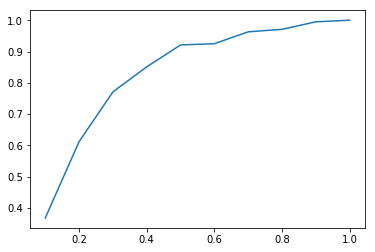

In [6]:
#課題4 結果のプロット

mList = [] #mを格納するリスト
pList = [] #mごとの固定確率を格納するリスト(縦軸の値)

for a in range(1,11,1): 
    
    iList4 = [] #固定の成否(0or1)を格納するリスト。mの初期条件ごとにリセットする。
    m = 0.1*a
    mList.append(m)  #mの値（横軸の値）
    
    for cycle in range(1000):
        iList4.append(moran2(1.0,m,9,1))    #モランプロセスを実行
    pList.append(mean(iList4))
    
print(pList)

import matplotlib.pyplot as plt
plt.plot(mList,pList)      #結果のプロット